In [22]:
%matplotlib inline
from itertools import islice
import os
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
from matplotlib.ticker import ScalarFormatter
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
import pandas as pd
from IPython.display import HTML

course_data = 'https://github.com/opherdonchin/StatisticalComputationAndAnalysis/raw/main/Data/'

In [24]:
cblm_data = pd.read_csv(os.path.join(course_data, 'cerebellar_volumes.csv'))
cblm_data

,CSF,CSFC,CSFC_Corr,GM,GMC,GMC_Corr,TCV,TCV_Corr,TIV,WM,...,M0x2FF,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0.325583,0.012326,0.009869,0.574668,0.101786,0.081499,0.163151,0.130633,1.248918,0.348668,...,F,R,74,2.0,3.0,29.0,0.0,1343.750000,0.743,1.306040
1,0.224247,0.008543,0.007405,0.551486,0.090218,0.078198,0.150485,0.130435,1.153713,0.377980,...,F,R,55,4.0,1.0,29.0,0.0,1146.590000,0.810,1.530630
2,0.277615,0.013279,0.008797,0.763742,0.120878,0.080075,0.188146,0.124636,1.509561,0.468205,...,M,R,28,NaN,NaN,NaN,NaN,1588.000000,0.803,1.105160
3,0.182494,0.013805,0.008593,0.898045,0.136560,0.085004,0.213211,0.132717,1.606506,0.525966,...,M,R,18,NaN,NaN,NaN,NaN,1737.150000,0.848,1.010280
4,0.168695,0.010256,0.008834,0.627242,0.099813,0.085971,0.155727,0.134132,1.161000,0.365063,...,F,R,24,NaN,NaN,NaN,NaN,1131.240000,0.862,1.551400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308,0.268687,0.013445,0.010169,0.648507,0.111217,0.084117,0.177308,0.134103,1.322175,0.404981,...,F,R,71,3.0,4.0,29.0,0.0,1264.410000,0.818,1.388000
309,0.161880,0.012168,0.008739,0.795457,0.126968,0.091186,0.193850,0.139218,1.392416,0.435078,...,M,R,19,NaN,NaN,NaN,NaN,1477.850000,0.880,1.187530
310,0.285254,0.012102,0.008810,0.644633,0.113232,0.082431,0.184905,0.134608,1.373652,0.443764,...,F,R,61,2.0,4.0,28.0,0.0,1353.524369,0.825,1.296615
311,0.369383,0.016518,0.010529,0.726034,0.117865,0.075129,0.189836,0.121005,1.568829,0.473413,...,M,R,61,5.0,2.0,30.0,0.0,1637.146719,0.780,1.071987


In [25]:
cblm_data.columns

Index(['CSF', 'CSFC', 'CSFC_Corr', 'GM', 'GMC', 'GMC_Corr', 'TCV', 'TCV_Corr',
       'TIV', 'WM', 'WMC', 'WMC_Corr', 'Gender', 'ID', 'M0x2FF', 'Hand', 'Age',
       'Educ', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF'],
      dtype='object')

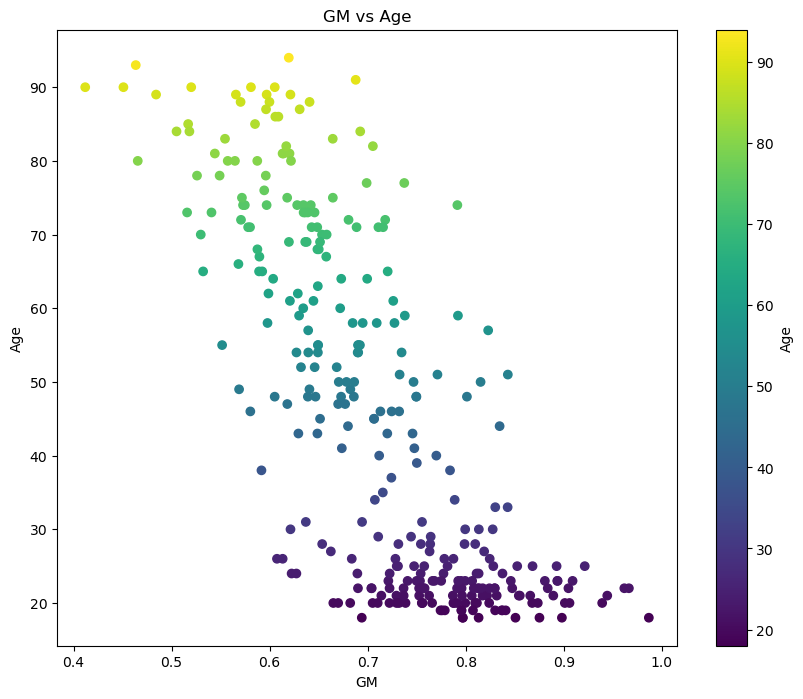

In [85]:
d = cblm_data.loc[:, ["GM", "Age"]]

fig, ax = plt.subplots(figsize=(10, 8))

scatter = ax.scatter(d["GM"], d["Age"], c=d["Age"], cmap='viridis', marker='o')

ax.set_xlabel('GM')
ax.set_ylabel('Age')
ax.set_title('GM vs Age')

# Add a colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Age')

plt.show()

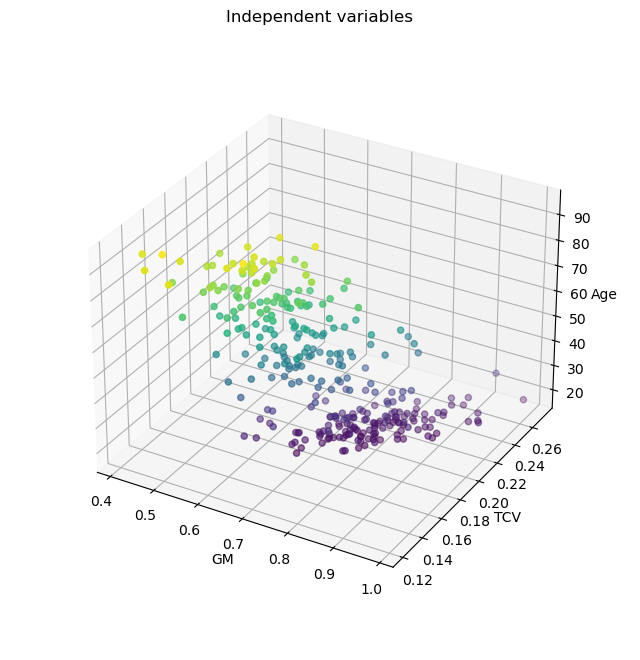

In [86]:
d = cblm_data.loc[:, ["GM", "TCV", "Age"]]

fig = plt.figure(figsize=(8,10))
ax = fig.add_subplot(111, projection='3d')
ax.set_box_aspect(None, zoom=0.85)
ax.scatter(d["GM"], d["TCV"], d["Age"], c=d["Age"], cmap='viridis', marker='o')
ax.set_xlabel('GM')
ax.set_ylabel('TCV')
ax.set_zlabel('Age')
ax.set_title('Independent variables')

# Add a colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Age')


plt.show()

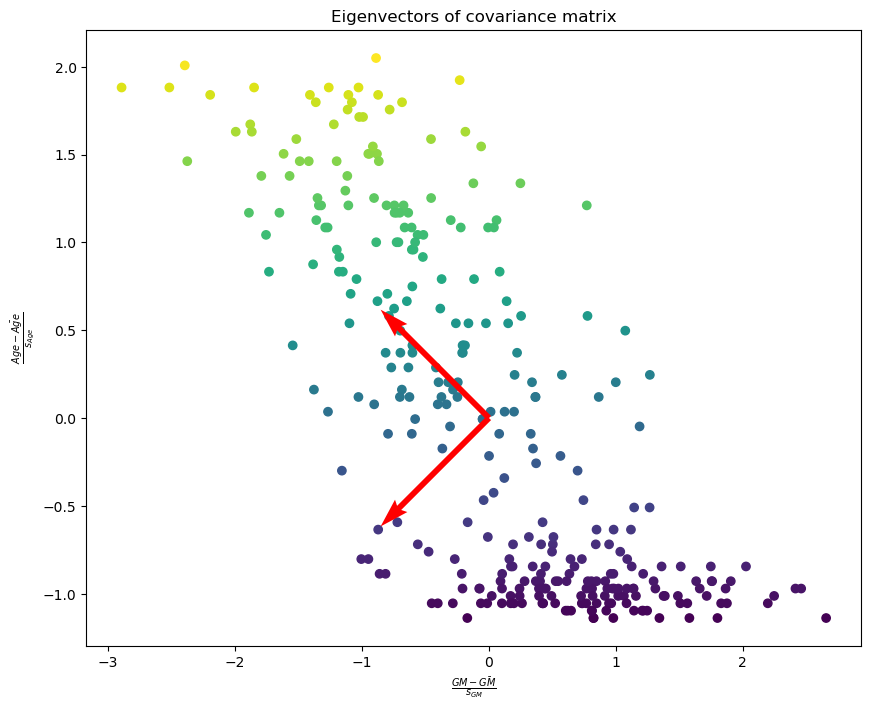

In [102]:
d = cblm_data.loc[:, ["GM", "Age"]]

d_centered = (d - d.mean()) / d.std()
data_ranges = d_centered.max() - d_centered.min()

cov_matrix = np.cov(d_centered.loc[:,["GM", "Age"]].T)

eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]
eigenvectors[:,0] = -eigenvectors[:,0]

scale_factor = 1
scaled_eigenvectors = eigenvectors*scale_factor

fig, ax = plt.subplots(figsize=(10, 8))

scatter = ax.scatter(d_centered["GM"], d_centered["Age"], 
                     c=d["Age"], cmap='viridis', marker='o')

mean = d_centered.mean().values
for i in range(2):
    ax.quiver(mean[0], mean[1],
              scaled_eigenvectors[0, i], scaled_eigenvectors[1, i],
              color='r', scale=1, scale_units='xy')

ax.set_xlabel(r'$\frac{GM-\bar{GM}}{s_{GM}}$')
ax.set_ylabel(r'$\frac{Age-\bar{Age}}{s_{Age}}$')
plt.title('Eigenvectors of covariance matrix')

plt.show()

In [103]:
for i in  range(2):
    print(f"Eigenvector {i}: {eigenvectors[0,i]:.3f} x_0 + {eigenvectors[1,i]:.3f} x_1")

Eigenvector 0: -0.707 x_0 + 0.707 x_1
Eigenvector 1: -0.707 x_0 + -0.707 x_1


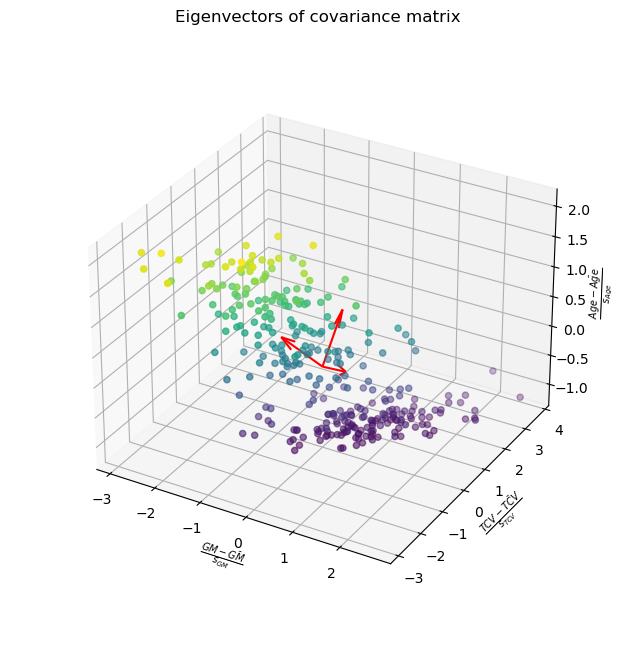

In [104]:
d = cblm_data.loc[:, ["GM", "TCV", "Age"]]

d_centered = (d - d.mean()) / d.std()
data_ranges = d_centered.max() - d_centered.min()

# Step 2: Compute the covariance matrix
cov_matrix = np.cov(d_centered.T)

# Step 3: Find the eigenvectors of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Sort eigenvectors by eigenvalues in descending order
idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]
eigenvectors[:,0] = -eigenvectors[:,0]

scale_factor = 0.5  # Adjust as needed
# scaled_eigenvectors = eigenvectors * eigenvalues[:, np.newaxis] * scale_factor * data_ranges.values
scaled_eigenvectors = eigenvectors

# Create the 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.set_box_aspect(None, zoom=0.85)

# Plot the scattered points
scatter = ax.scatter(d_centered["GM"], d_centered["TCV"], d_centered["Age"], 
                     c=d["Age"], cmap='viridis', marker='o')

# Plot eigenvectors as arrows
mean = d_centered.mean().values
for i in range(3):
    ax.quiver(mean[0], mean[1], mean[2],
              scaled_eigenvectors[0, i], scaled_eigenvectors[1, i], scaled_eigenvectors[2, i],
              color='r')

ax.set_xlabel(r'$\frac{GM-\bar{GM}}{s_{GM}}$')
ax.set_ylabel(r'$\frac{TCV-\bar{TCV}}{s_{TCV}}$')
ax.set_zlabel(r'$\frac{Age-\bar{Age}}{s_{Age}}$')
plt.title('Eigenvectors of covariance matrix')

plt.show()

In [105]:
for i in  range(3):
    print(f"Eigenvector {i}: {eigenvectors[0,i]:.3f} x_0 + {eigenvectors[1,i]:.3f} x_1 + {eigenvectors[2,i]:.3f} x_2")

Eigenvector 0: -0.611 x_0 + -0.575 x_1 + 0.544 x_2
Eigenvector 1: 0.147 x_0 + 0.592 x_1 + 0.792 x_2
Eigenvector 2: 0.778 x_0 + -0.564 x_1 + 0.277 x_2


Text(0.5, 1.0, 'Eigenvectors of covariance matrix')

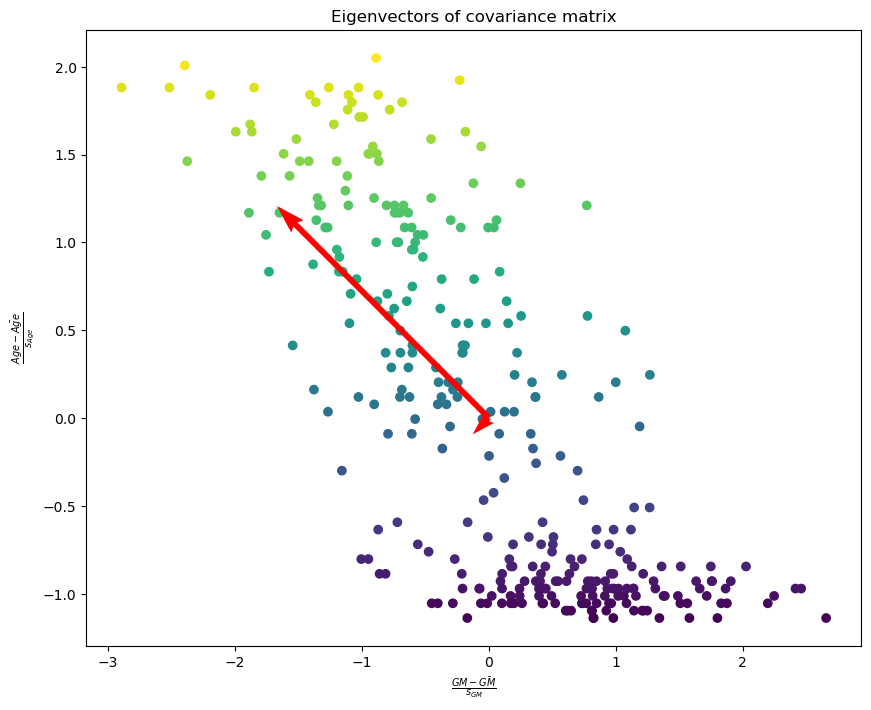

In [106]:
d = cblm_data.loc[:, ["GM", "Age"]]

d_centered = (d - d.mean()) / d.std()
data_ranges = d_centered.max() - d_centered.min()

cov_matrix = np.cov(d_centered.T)

eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]
eigenvectors[:,0] = -eigenvectors[:,0]

scale_factor = 0.2
scaled_eigenvectors = eigenvectors * eigenvalues[np.newaxis, :] * scale_factor * data_ranges.values

fig, ax = plt.subplots(figsize=(10, 8))

scatter = ax.scatter(d_centered["GM"], d_centered["Age"], 
                     c=d["Age"], cmap='viridis', marker='o')

mean = d_centered.mean().values
for i in range(2):
    ax.quiver(mean[0], mean[1],
              scaled_eigenvectors[0, i], scaled_eigenvectors[1, i],
              color='r', scale=1, scale_units='xy')

ax.set_xlabel(r'$\frac{GM-\bar{GM}}{s_{GM}}$')
ax.set_ylabel(r'$\frac{Age-\bar{Age}}{s_{Age}}$')
plt.title('Eigenvectors of covariance matrix')


In [107]:
print(eigenvalues)

[1.76350699 0.23649301]


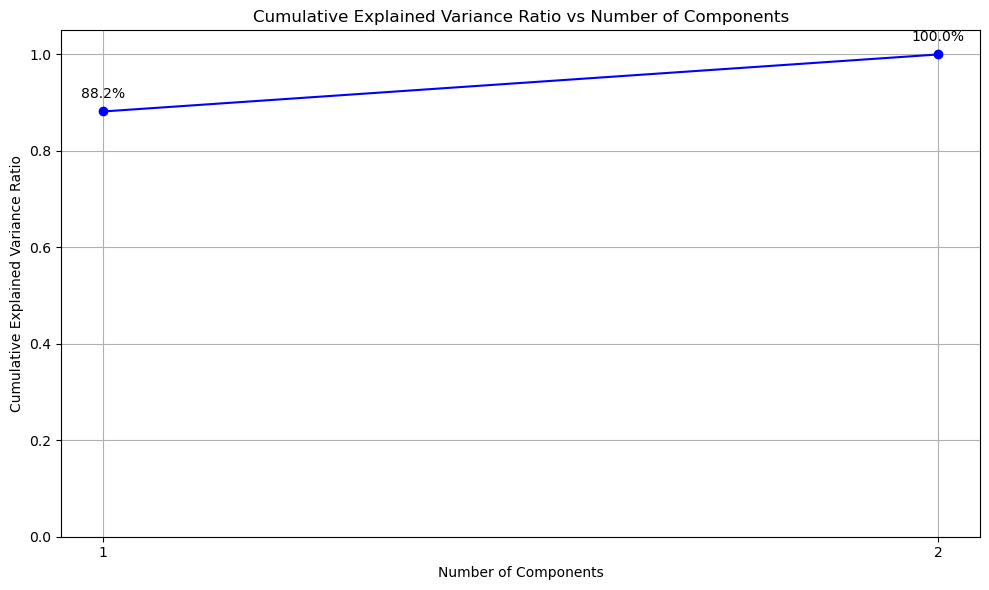

In [108]:
cumulative_variance_ratio = np.cumsum(eigenvalues)/np.sum(eigenvalues)

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, 'bo-')
ax.set_xlabel('Number of Components')
ax.set_ylabel('Cumulative Explained Variance Ratio')
ax.set_title('Cumulative Explained Variance Ratio vs Number of Components')

# Add percentage labels
for i, txt in enumerate(np.round(cumulative_variance_ratio * 100, 1)):
    ax.annotate(f'{txt}%', (i + 1, cumulative_variance_ratio[i]), textcoords="offset points", 
                xytext=(0,10), ha='center')

ax.set_xticks(range(1, len(cumulative_variance_ratio) + 1))
ax.set_ylim(0, 1.05)
ax.grid(True)

plt.tight_layout()
plt.show()

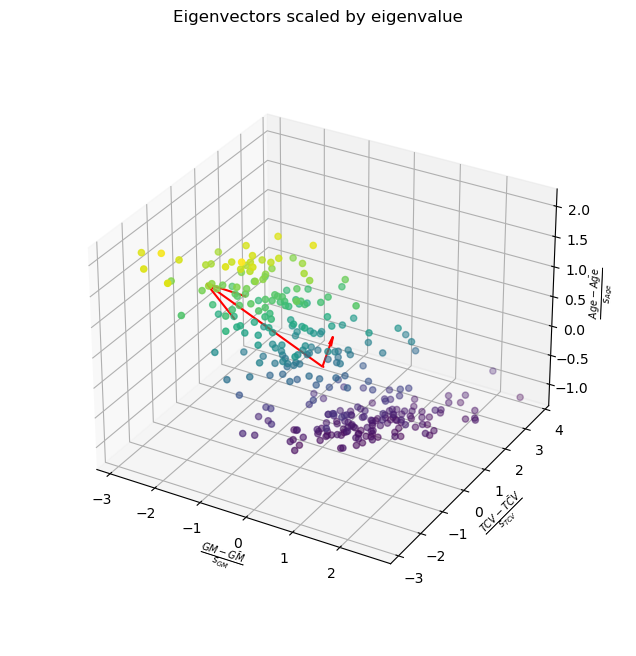

In [110]:

# Assuming cblm_data is already defined
d = cblm_data.loc[:, ["GM", "TCV", "Age"]]

# Step 1: Center the variables
d_centered = (d - d.mean()) / d.std()
data_ranges = d_centered.max() - d_centered.min()

# Step 2: Compute the covariance matrix
cov_matrix = np.cov(d_centered.T)

# Step 3: Find the eigenvectors of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Sort eigenvectors by eigenvalues in descending order
idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]
eigenvectors[:,0] = -eigenvectors[:,0]

scale_factor = 0.2  # Adjust as needed
scaled_eigenvectors = eigenvectors * eigenvalues[np.newaxis, :] * scale_factor * data_ranges.values
# scaled_eigenvectors = eigenvectors

# Create the 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.set_box_aspect(None, zoom=0.85)

# Plot the scattered points
scatter = ax.scatter(d_centered["GM"], d_centered["TCV"], d_centered["Age"], 
                     c=d["Age"], cmap='viridis', marker='o')

# Plot eigenvectors as arrows
mean = d_centered.mean().values
for i in range(3):
    ax.quiver(mean[0], mean[1], mean[2],
              scaled_eigenvectors[0, i], scaled_eigenvectors[1, i], scaled_eigenvectors[2, i],
              color='r')

ax.set_xlabel(r'$\frac{GM-\bar{GM}}{s_{GM}}$')
ax.set_ylabel(r'$\frac{TCV-\bar{TCV}}{s_{TCV}}$')
ax.set_zlabel(r'$\frac{Age-\bar{Age}}{s_{Age}}$')
plt.title('Eigenvectors scaled by eigenvalue')


plt.show()

In [111]:
print(eigenvalues)

[2.5018434  0.40153322 0.09662337]


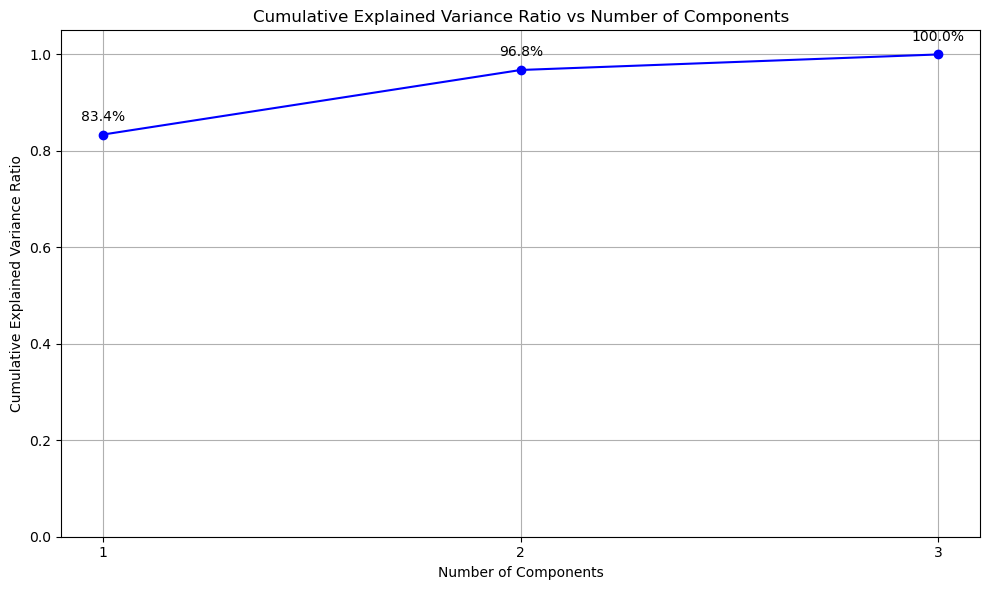

In [112]:
cumulative_variance_ratio = np.cumsum(eigenvalues)/np.sum(eigenvalues)

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, 'bo-')
ax.set_xlabel('Number of Components')
ax.set_ylabel('Cumulative Explained Variance Ratio')
ax.set_title('Cumulative Explained Variance Ratio vs Number of Components')

# Add percentage labels
for i, txt in enumerate(np.round(cumulative_variance_ratio * 100, 1)):
    ax.annotate(f'{txt}%', (i + 1, cumulative_variance_ratio[i]), textcoords="offset points", 
                xytext=(0,10), ha='center')

ax.set_xticks(range(1, len(cumulative_variance_ratio) + 1))
ax.set_ylim(0, 1.05)
ax.grid(True)

plt.tight_layout()
plt.show()

In [46]:
def column_magnitude(matrix, i):
    return np.sqrt(np.sum(matrix[:, i]**2))

for i in range(3):
    print(f"Eigenvector {i}: eigenvalue {eigenvalues[i]}")
    print(f"Unscaled")
    print([eigenvectors[0, i], eigenvectors[1, i], eigenvectors[2, i]])
    print(f"Magnitude: {column_magnitude(eigenvectors, i)}")
    print(f"Scaled")
    print([scaled_eigenvectors[0, i], scaled_eigenvectors[1, i], scaled_eigenvectors[2, i]])
    print(f"Magnitude: {column_magnitude(scaled_eigenvectors, i)}")


Eigenvector 0: eigenvalue 2.501843401310216
Unscaled
[0.6106006500277301, 0.5754077559083578, -0.544125684586035]
Magnitude: 1.0
Scaled
[4.23845483172519, 0.6410433107857245, -0.14587188673506643]
Magnitude: 4.289139132065709
Eigenvector 1: eigenvalue 0.4015332246175135
Unscaled
[0.14746845209160256, 0.5924501573978218, 0.7919948652844934]
Magnitude: 1.0
Scaled
[1.2124024197692602, 0.7817373391744238, 0.2514734357567153]
Magnitude: 1.4643332215766849
Eigenvector 2: eigenvalue 0.09662337407226923
Unscaled
[0.7780873356014868, -0.5638339520105221, 0.2768959601308325]
Magnitude: 1.0
Scaled
[3.102781085474653, -0.3608572015692477, 0.0426443485933659]
Magnitude: 3.123985743368655
